In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
groceries = pd.read_csv('groceries/groceries - groceries.csv', delimiter=',')

with open('recipe-ingredients-dataset/train.json', 'r') as f:
    txt = f.read()
recipes = pd.DataFrame(json.loads(txt))

In [3]:
#Convert Market Basket dataset to arrays
groceries_array = groceries.values

# Remove NaN from baskets_arrays
groceries_array_clean = []
for i in groceries_array:
   groceries_array_clean.append([x for x in i if str(x) !='nan'])

df_groceries_array_clean = pd.DataFrame()
df_groceries_array_clean["items"] = groceries_array_clean

#remove first element from list (the number of elements)
for index, row in df_groceries_array_clean.iterrows():
    row['items'].pop(0)

In [4]:
df_groceries_array_clean

,items
0,"[citrus fruit, semi-finished bread, margarine,..."
1,"[tropical fruit, yogurt, coffee]"
2,[whole milk]
3,"[pip fruit, yogurt, cream cheese, meat spreads]"
4,"[other vegetables, whole milk, condensed milk,..."
...,...
9830,"[sausage, chicken, beef, hamburger meat, citru..."
9831,[cooking chocolate]
9832,"[chicken, citrus fruit, other vegetables, butt..."
9833,"[semi-finished bread, bottled water, soda, bot..."


In [5]:
recipes

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [6]:
#Remove stopwords 
import re

stopwords = 'cloves ground black all-purpose kosher green large unsalted extra-virgin purple grated dried chopped \
fresh diced minced brown extract dry white yellow boneless skinless breasts breast flat freshly sea dried \
granulated crushed shredded whole halves peeled coarse warm yolks cold flakes whites cooking fat free less sodium \
sliced finely low light cracked spring lean cooked part-skim roasted sliced flank unsweetened sweetened melted fine \
yellow dark smoked toasted crumbles plain evaporated baking firm red 1% low-fat \
reduced-fat italian greek style whole peeled shoulder plain unbleached dry baby and frozen\
button cremini pure reduced steamed nonfat & de medium extra prepared bow-tie pepper salt'

#this was just to try with less stopwords
stopwords2 = 'fresh ground large extra-virgin black white whites diced chopped freshly cloves crushed yellow boneless \
skinless halves half peeled sliced fat free less sodium finely crushed yolks lean'

stopwords = stopwords.split(' ')
stopwords2 = stopwords2.split(' ')

def remove_stop_words(query):
    querywords = query.split()
    results_word = [word.lower() for word in querywords if word.lower() not in stopwords]
    results = ' '.join(results_word)
    return results


ingredients_filtered = []

for i in recipes["ingredients"]:
    temp_l = []
    for j in i:
        temp_l.append(remove_stop_words(j))
        
    ingredients_filtered.append(temp_l)
    
recipes["ingredients_filtered"] = ingredients_filtered

In [7]:
#Convert lists of ingredients to strings
recipes["ingredients_string"] = recipes["ingredients_filtered"].str.join(" ")

In [8]:
recipes

,id,cuisine,ingredients,ingredients_filtered,ingredients_string
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...","[romaine lettuce, olives, grape tomatoes, garl...",romaine lettuce olives grape tomatoes garlic ...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...","[flour, , , tomatoes, , thyme, eggs, tomatoes,...",flour tomatoes thyme eggs tomatoes corn mea...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[eggs, , , mayonaise, oil, chilies, grilled ch...",eggs mayonaise oil chilies grilled chicken g...
3,22213,indian,"[water, vegetable oil, wheat, salt]","[water, vegetable oil, wheat, ]",water vegetable oil wheat
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...","[, shallots, cornflour, cayenne, onions, garli...",shallots cornflour cayenne onions garlic past...
...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...","[sugar, sugar, butter, water, eggs, flour, whe...",sugar sugar butter water eggs flour wheat flou...
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...","[kraft zesty dressing, onion, broccoli florets...",kraft zesty dressing onion broccoli florets ro...
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...","[eggs, citrus fruit, raisins, sourdough starte...",eggs citrus fruit raisins sourdough starter fl...
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...","[chicken thigh, garlic, rice, powder, corn sta...",chicken thigh garlic rice powder corn starch s...


In [9]:
#define function to change words from plural form to singular
from nltk.stem import *

stemmer = PorterStemmer()

def custom_tokenizer(document):
    document_list = document.split(" ")
    return [stemmer.stem(word) for word in document_list]

In [10]:
#Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

#stop_words is the list of stop word created before, tokenizer is the function that changes plural to singular
count_vect = CountVectorizer(tokenizer=custom_tokenizer)

counts = count_vect.fit_transform(recipes["ingredients_string"])
words = count_vect.get_feature_names()

In [17]:
counts

<39774x2765 sparse matrix of type '<class 'numpy.int64'>'
	with 556377 stored elements in Compressed Sparse Row format>

In [12]:
#SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
svd.fit(counts)
counts_svd = svd.transform(counts)

In [13]:
#PCA
from sklearn.decomposition import PCA

counts_array = counts.toarray()

pca = PCA(n_components = 2)
pca.fit(counts_array)
counts_array_pca = pca.transform(counts_array)

In [15]:
#K-Means clustering
from sklearn.cluster import KMeans

number_of_clusters = 10
kmeans10 = KMeans(n_clusters=number_of_clusters)
kmeans10.fit(counts)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
print("Top terms per cluster:")
order_centroidsK10 = kmeans10.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(number_of_clusters):
    top_wordsK10 = [terms[ind] for ind in order_centroidsK10[i, :30]]
    print("Cluster {}: {}".format(i, ', '.join(top_wordsK10)))

Top terms per cluster:
Cluster 0: , onion, garlic, chicken, oil, butter, flour, water, sauc, tomato, egg, powder, veget, chees, broth, thyme, milk, parsley, sugar, juic, celeri, lemon, bell, rice, leav, potato, beef, cream, carrot, vinegar
Cluster 1: chees, , parmesan, garlic, oil, mozzarella, tomato, oliv, sauc, egg, onion, basil, ricotta, pasta, butter, flour, parsley, cream, oregano, milk, chicken, spinach, lasagna, noodl, leav, water, beef, mushroom, bread, season
Cluster 2: , sugar, water, juic, onion, sauc, lime, oil, garlic, milk, butter, chicken, lemon, rice, flour, egg, cilantro, veget, cream, leav, vinegar, tomato, coconut, chili, powder, orang, ginger, corn, chile, past
Cluster 3: , onion, chili, garlic, powder, cilantro, oil, tomato, cumin, lime, chicken, corn, tortilla, juic, chees, oliv, jalapeno, bean, cream, sauc, chile, bell, avocado, sour, oregano, broth, flour, veget, water, salsa
Cluster 4: sugar, egg, flour, , butter, powder, milk, vanilla, cream, water, cinnamon, 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/externals/six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

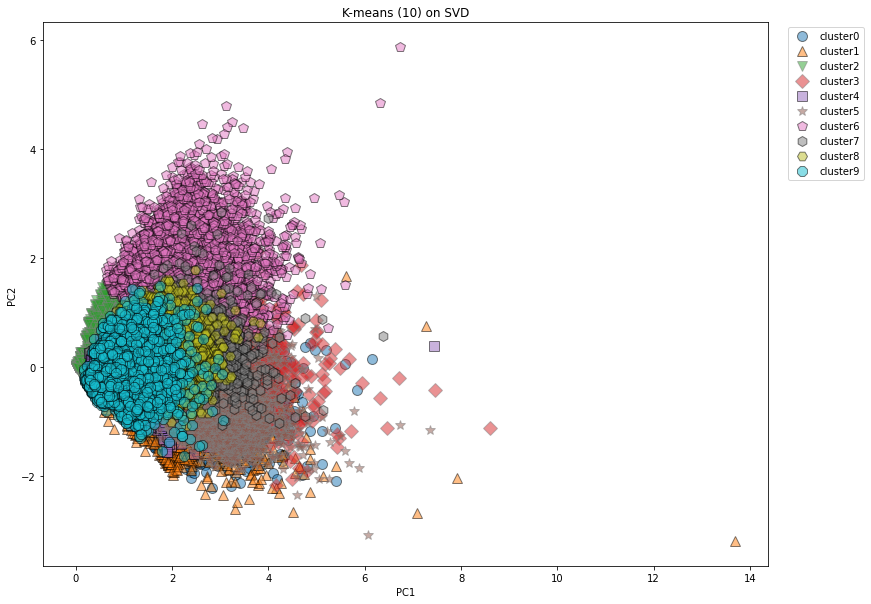

In [18]:
import mglearn

#Plot k-means 10 clusters on SVD
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(counts_svd[:,0], counts_svd[:,1], kmeans10.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (10) on SVD")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

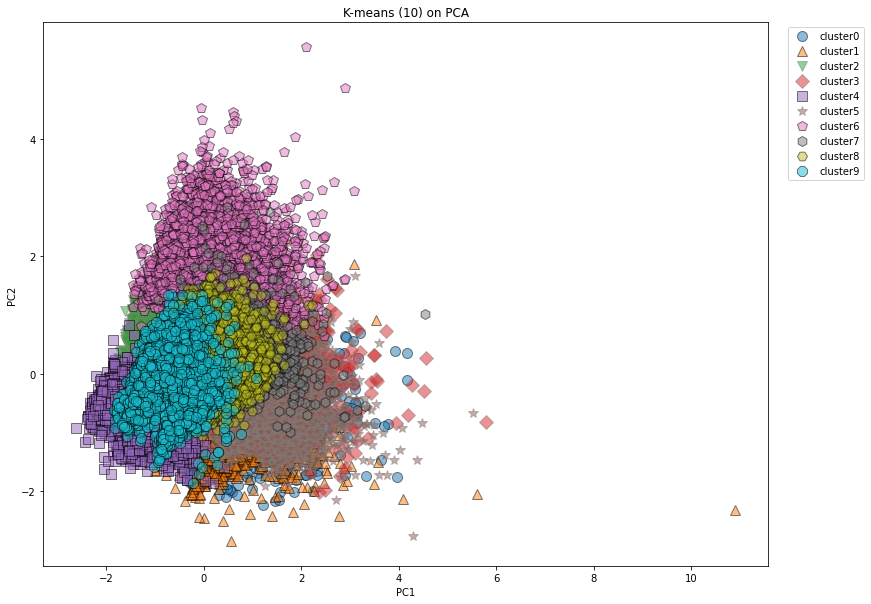

In [19]:
#Plot k-means 10 clusters on SVD
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(counts_array_pca[:,0], counts_array_pca[:,1], kmeans10.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (10) on PCA")
plt.show

In [20]:
number_of_clusters = 50
kmeans50 = KMeans(n_clusters=number_of_clusters)
kmeans50.fit(counts)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
print("Top terms per cluster:")
order_centroidsK50 = kmeans50.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(number_of_clusters):
    top_wordsK50 = [terms[ind] for ind in order_centroidsK50[i, :30]]
    print("Cluster {}: {}".format(i, ', '.join(top_wordsK50)))

Top terms per cluster:
Cluster 0: orang, juic, sugar, , lemon, water, egg, butter, lime, cinnamon, oil, zest, cream, flour, wine, oliv, vanilla, powder, peel, liqueur, milk, onion, honey, ice, ginger, vinegar, almond, concentr, garlic, chicken
Cluster 1: chile, , onion, garlic, oil, cilantro, tomato, cumin, chicken, corn, oregano, water, veget, tortilla, lime, broth, ancho, oliv, pork, seed, chipotl, powder, leav, juic, tomatillo, avocado, poblano, vinegar, guajillo, serrano
Cluster 2: powder, chili, , onion, garlic, tomato, cumin, chees, bean, oil, corn, cilantro, tortilla, chicken, sauc, oliv, cream, sour, cheddar, bell, jalapeno, flour, lime, oregano, salsa, broth, beef, jack, veget, avocado
Cluster 3: , lemon, oliv, oil, juic, garlic, parsley, onion, chees, tomato, chicken, water, wine, oregano, leaf, leav, zest, cumin, mint, vinegar, butter, paprika, cucumb, shrimp, cilantro, feta, yogurt, caper, thyme, fillet
Cluster 4: , onion, garlic, oil, powder, chicken, tomato, water, oliv, 

<function matplotlib.pyplot.show(*args, **kw)>

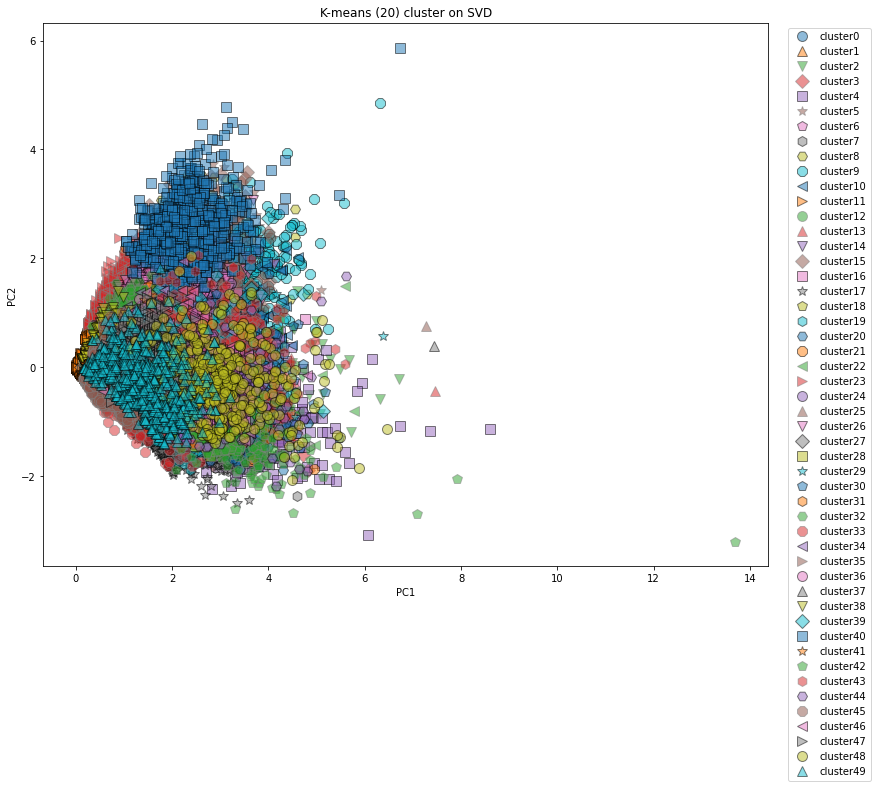

In [24]:
#Plot k-means 20 clusters on SVD
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(counts_svd[:,0], counts_svd[:,1], kmeans50.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10',
       'cluster11', 'cluster12', 'cluster13', 'cluster14', 'cluster15',
       'cluster16', 'cluster17', 'cluster18', 'cluster19', 'cluster20', 'cluster21', 'cluster22', 'cluster23', 'cluster24',
       'cluster25', 'cluster26', 'cluster27', 'cluster28', 'cluster29', 'cluster30',
       'cluster31', 'cluster32', 'cluster33', 'cluster34', 'cluster35',
       'cluster36', 'cluster37', 'cluster38', 'cluster39', 'cluster40', 'cluster41', 'cluster42', 'cluster43', 'cluster44',
       'cluster45', 'cluster46', 'cluster47', 'cluster48', 'cluster49'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (20) cluster on SVD")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

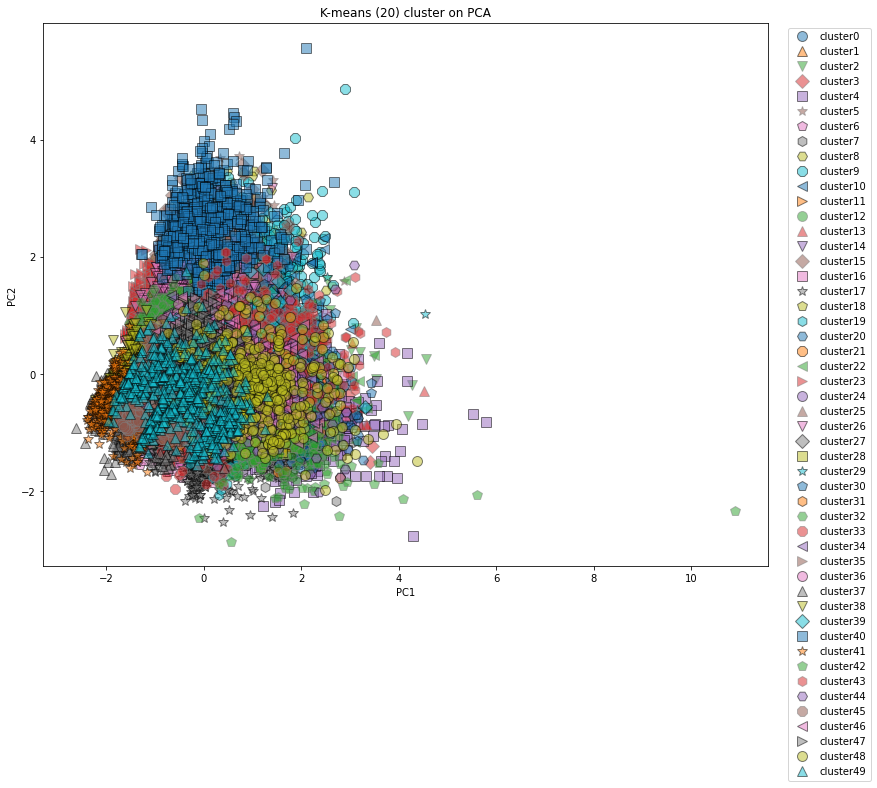

In [25]:
#Plot k-means 20 clusters on SVD
plt.figure(figsize=(13,10))
mglearn.discrete_scatter(counts_array_pca[:,0], counts_array_pca[:,1], kmeans50.labels_, alpha = 0.5)
plt.legend(['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4',
       'cluster5', 'cluster6', 'cluster7', 'cluster8', 'cluster9', 'cluster10',
       'cluster11', 'cluster12', 'cluster13', 'cluster14', 'cluster15',
       'cluster16', 'cluster17', 'cluster18', 'cluster19', 'cluster20', 'cluster21', 'cluster22', 'cluster23', 'cluster24',
       'cluster25', 'cluster26', 'cluster27', 'cluster28', 'cluster29', 'cluster30',
       'cluster31', 'cluster32', 'cluster33', 'cluster34', 'cluster35',
       'cluster36', 'cluster37', 'cluster38', 'cluster39', 'cluster40', 'cluster41', 'cluster42', 'cluster43', 'cluster44',
       'cluster45', 'cluster46', 'cluster47', 'cluster48', 'cluster49'], bbox_to_anchor=(1.02, 1), loc=2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means (20) cluster on PCA")
plt.show